# インストール

## 解説
- pip というコマンドを使ってパッケージをインストール
  - pip とは
    - Pythonの管理システムであり、Pythonに関わるインストール、アップデート、アンインストールを行うためのツールです。
- 利用方法
  - pip install requests は requests パッケージをインストールします。
  - R言語のinstall.packages()に相当
- 注意
  - パソコンを変えない限り、基本的に1回実行すれば良い。

# 作業

In [2]:
!pip install opencv-python

# 以下のメッセージが表示されればインストール成功
# Successfully installed opencv-python-4.10.0.84
# Note: you may need to restart the kernel to use updated packages.

# opencv-pythonのインストール
# opencv とは、画像処理ライブラリのこと

# 撮影した画像を取り込み、表示するプログラム


## 命令を使う準備

In [5]:
import cv2 # R言語のlibrary()に相当する
# Python の OpenCV ライブラリを使うための準備です。
# OpenCV は画像処理やコンピュータビジョンのための非常に強力なツールキットです。
# たとえば、顔認識や画像のフィルタリングなど、画像を扱う多くのタスクに使用されます。
# 画像処理といえば、OpenCV です。

import matplotlib.pyplot as plt # R言語のggplot2に相当する
# 簡単にグラフを描くための機能を提供します。

%matplotlib inline 
# 画面に表示するためのおまじない
# これらのコマンドを使うことで、Python で画像を処理したり、グラフを描いたりするための準備が整います。

## 画像の表示

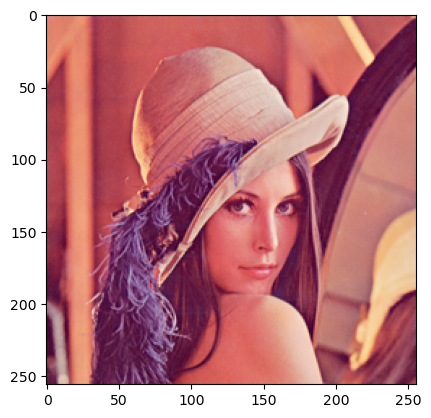

In [58]:
# 画像の読み込み
img = cv2.imread('/Users/oyokuratomo/Downloads/Lenna.png')
# 色の変換（Pythonの一般的な形式に合わせるため）
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cvtColor関数を使って色を変換している
# cv2.COLOR_BGR2RGBはBGRからRGBに変換する
# BGRはOpenCVのデフォルトの色の並び順で、RGBはコンピュータ上の基本的な色の並び順 

# 画像の表示
plt.imshow(img)

# 顔の検出
## 画像から顔の位置を計算する

In [7]:
# 黒と白の画像に変換して処理を簡単にする 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔を検出する
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# 計算した顔の位置を描画する

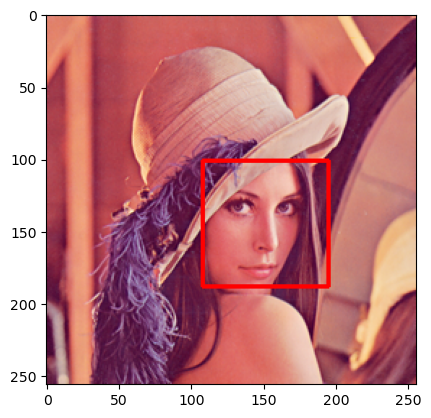

In [8]:
# 検出した顔の周りに矩形を描画する
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# 出力を表示する
plt.imshow(img)

# 人を検出してみる


In [57]:
!pip install ultralytics
!pip install huggingface_hub

In [ ]:
# 人を検出してみる

#pip install git+https://github.com/THU-MIG/yolov10.git
from ultralytics import YOLO

# Load a pretrained YOLOv10n model
model = YOLO("yolov10n.pt")

# Perform object detection on an image
results = model('/Users/oyokuratomo/Downloads/Lenna.png')

# Display the results
results[0].show()

# 何をしているのか理解しよう
## 画像とはそもそもなんだろうか？


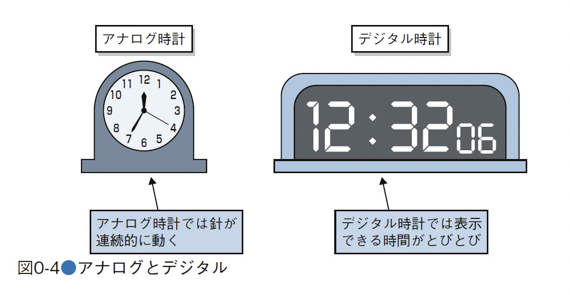

山田 宏尚. 増補改訂版 図解でわかる はじめてのデジタル画像処理 (Japanese Edition) (Kindle の位置No.279). Kindle 版. 

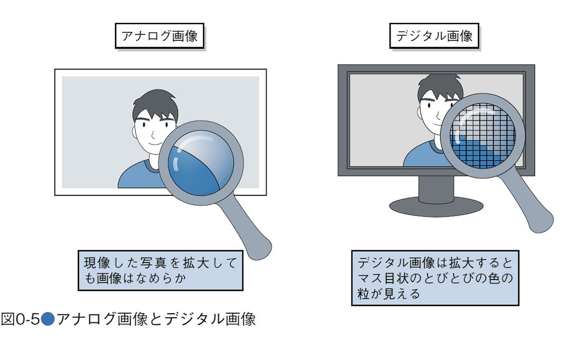

山田 宏尚. 増補改訂版 図解でわかる はじめてのデジタル画像処理 (Japanese Edition) (Kindle の位置No.276). Kindle 版. 

## 画像ってどうやって得られるの？

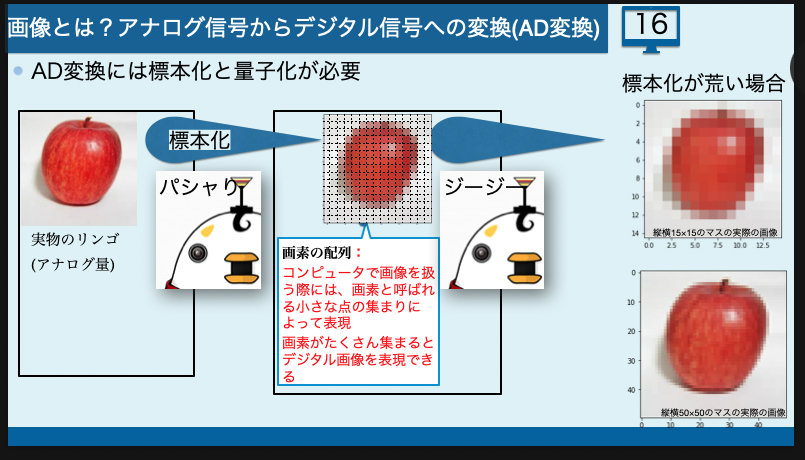

## 白黒画像

[[  0 255]
 [255   0]]


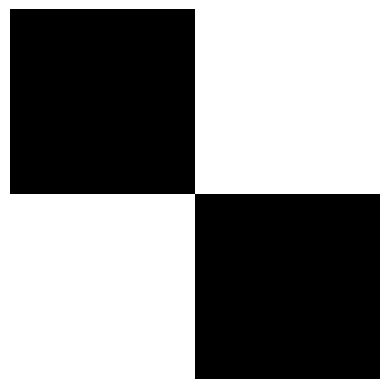

In [45]:
# 2x2の白黒画像データを作成
# ここでは、0が黒、255が白を表します
white_black_pic = np.array([[0, 255],
                            [255, 0]])
print(white_black_pic)
# 画像を表示
plt.axis('off')  # Hide the axes
plt.imshow(data, cmap='gray')

## 3*3の円

[[  0 255   0]
 [255 255 255]
 [  0 255   0]]


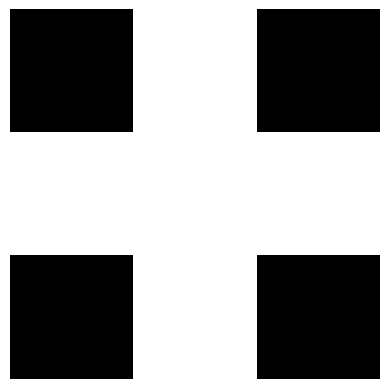

In [50]:
# 白黒で解像度の円を表現
# ここでは、0が黒、255が白を表します
en = np.array([[0, 255, 0],
                [255, 255, 255],
                [0, 255, 0]])
print(en)
plt.axis('off')  # Hide the axes
plt.imshow(en, cmap='gray')

## 10 * 10の画像

[[  0   0   0   0 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255   0   0   0]
 [  0   0 255 255   0   0 255 255   0   0]
 [  0 255 255   0   0   0   0 255 255   0]
 [255 255   0   0   0   0   0   0 255 255]
 [255 255   0   0   0   0   0   0 255 255]
 [  0 255 255   0   0   0   0 255 255   0]
 [  0   0 255 255   0   0 255 255   0   0]
 [  0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0 255 255   0   0   0   0]]


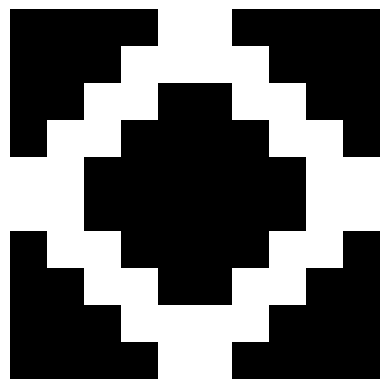

In [56]:
en = np.array([
        [0, 0, 0, 0, 255, 255, 0, 0, 0, 0],
        [0, 0, 0, 255, 255, 255, 255, 0, 0, 0],
        [0, 0, 255, 255, 0, 0, 255, 255, 0, 0],
        [0, 255, 255, 0, 0, 0, 0, 255, 255, 0],
        [255, 255, 0, 0, 0, 0, 0, 0, 255, 255],
        [255, 255, 0, 0, 0, 0, 0, 0, 255, 255],
        [0, 255, 255, 0, 0, 0, 0, 255, 255, 0],
        [0, 0, 255, 255, 0, 0, 255, 255, 0, 0],
        [0, 0, 0, 255, 255, 255, 255, 0, 0, 0],
        [0, 0, 0, 0, 255, 255, 0, 0, 0, 0]
        ], dtype=np.uint8)
print(en)
plt.axis('off')  # Hide the axes
plt.imshow(en, cmap='gray')

## カラー画像とは？
- RGB
  - R：赤
  - G：緑
  - B：青
- RGB とは：
  - スマートフォンやノートパソコンなどのディスプレイ上で様々な色を使うためには、色彩の表現方法が必要です。RGB では、コンピュータが赤、緑、青の濃さ（光の強さ）を合成して、ディスプレイ上に表現する色を決めています。人間は目でディスプレイの光の明暗を感じ、その光の強さから脳で色を感じ取ります。RGB では赤、緑、青の光の強さを0 から255 の整数値で表現します。RGB の数値0 は光の強さが最も弱く、数値255 は光の強さが最も強くなります。例えば、白の指定は、数値255 を利用して、[255, 255, 255] と指定します。これとは逆に、黒にするには、白の逆でRGB の各色を数値0 で[0, 0, 0] と指定します。同様に、明るい赤は[255, 0, 0] と指定し、暗い赤は[100, 0, 0]と指定します。赤と青を混色は紫になるように、明るい紫は[255, 0, 255]、暗い紫は[100, 0, 100]と指定します

[[[255   0   0]]]


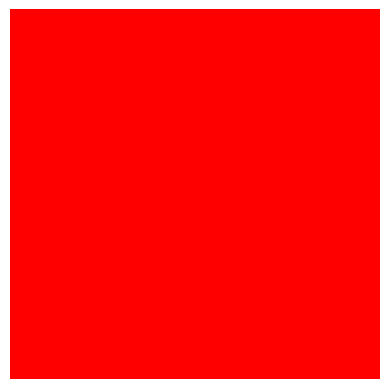

In [42]:
# 3次元配列
# R, G, B の3つの要素を持つ配列
color_image = np.array([[[255, 0, 0]]],
                    dtype=np.uint8)
print(color_image) # 画像を表示
plt.axis('off')  # Hide the axes
plt.imshow(color_image)

[[[  0 255   0]]]


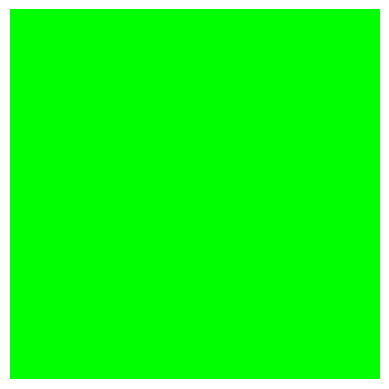

In [43]:
color_image = np.array([[[0, 255, 0]]],
                    dtype=np.uint8)
print(color_image) # 画像を表示
plt.axis('off')  # Hide the axes
plt.imshow(color_image)

[[[  0   0 255]]]


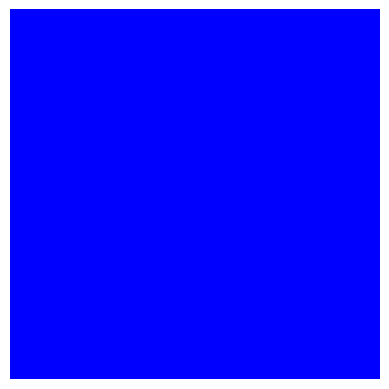

In [44]:
color_image = np.array([[[0, 0, 255]]],
                    dtype=np.uint8)
print(color_image) # 画像を表示
plt.axis('off')  # Hide the axes
plt.imshow(color_image)

## 自分の好きな色を作る

In [ ]:
color_image = np.array([[[???, ???, ???]]],
                    dtype=np.uint8)
print(color_image) # 画像を表示
plt.axis('off')  # Hide the axes
plt.imshow(color_image)

# 取り込んだ画像を白黒で表現しExcelで見てみよう

In [62]:
# 変数 gray を整数値でcsv出力
np.savetxt('gray.csv', gray, delimiter=',', fmt='%d')



gray.csv を出力したら、Excelで開いてみましょう。
その後に、下記のような色付けを行いましょう
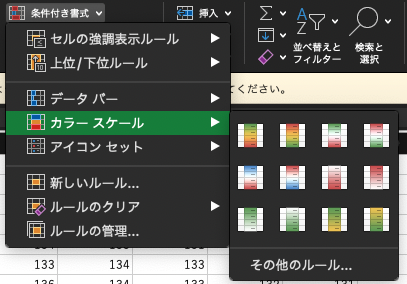